<a href="https://colab.research.google.com/github/dellaanima/NLP_GoingDeeper/blob/main/16/Project_nsmc_hf_klue_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.0 MB/s eta 0:00:00


In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.1 MB/s eta 0:00:00


In [ ]:
pip install accelerate -U

# Load NSMC Dataset


- [Naver Sentiment Movie Corpus](https://github.com/e9t/nsmc)
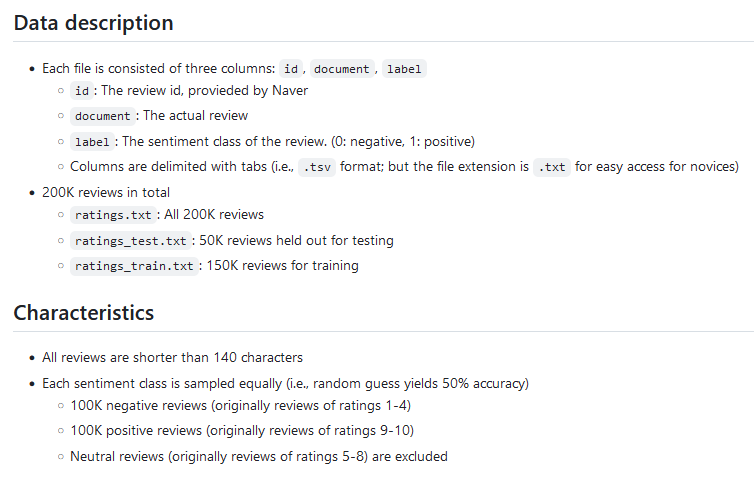

In [1]:
from datasets import load_dataset

dataset = load_dataset('nsmc')

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})

In [3]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [4]:
# 데이터셋을 pandas DataFrame으로 변환
df = train_dataset.to_pandas()

# DataFrame 확인
display(df.head())

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# Load HF Model & Tokenizer
- [klue/bert-base](https://huggingface.co/klue/bert-base)


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("klue/bert-base")
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Data Prepocessing for Training


- tokenizer 처리하면
1. "input_ids" 에 정수로 인코딩된 리스트 담기고
2. "attention_mask" 에 어텐션을 진행할 토큰 마스크(문장 토큰 1 과 패딩 토큰 으로 구분)

In [6]:
# tokenzier function
def tokenize_w_padding(data):
    return tokenizer(
        data['document'],
        truncation=True,
        padding='max_length',
        return_token_type_ids=False,
    )

In [11]:

train_dataset = train_dataset.map(tokenize_w_padding, batched=True)
test_dataset = test_dataset.map(tokenize_w_padding, batched=True)

Map:   0%|          | 0/150000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [10]:
train_dataset

Dataset({
    features: ['id', 'document', 'label', 'input_ids', 'attention_mask'],
    num_rows: 150000
})

In [11]:
# 데이터셋을 pandas DataFrame으로 변환
df = train_dataset.to_pandas()

# DataFrame 확인
display(df.head())

,id,document,label,input_ids,attention_mask
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[2, 1376, 831, 2604, 18, 18, 4229, 9801, 2075,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[2, 1963, 18, 18, 18, 11811, 2178, 2088, 28883...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[2, 12381, 3758, 2251, 2615, 18, 18, 7946, 469...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[2, 3734, 2582, 2743, 2029, 2079, 26268, 2255,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


# 모델 학습

## Dynamic Padding 없음

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import numpy as np
from transformers import Trainer, TrainingArguments

# 가중치를 저장할 위치
output_dir = '/content/drive/MyDrive/nsmc-hf-kluebert'

training_arguments = TrainingArguments(
    output_dir,
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=1,
    weight_decay=0.01,
)

In [15]:
training_arguments

TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_always_push=False,
hub_mod

In [15]:
import datasets

metric = datasets.load_metric('accuracy')


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-15-16e5866ef142>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = datasets.load_metric('accuracy')


In [17]:
# fine-tuning trainer
trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
# fine-tuning
trainer.train()

## Dynamic Padding 추가
- [Dynamic Padding]

https://www.youtube.com/watch?v=7q5NyFT8REg
https://wandb.ai/wandb_fc/korean/reports/HuggingFace---Vmlldzo1MDIyNDM
https://www.kaggle.com/code/sajjadayobi360/dynamic-padding-sortish-bathes

In [9]:
# 전처리시 패딩 미적용
def tokenize_wo_padding(data):
    return tokenizer(
        data['document'],
        truncation=True,
        return_token_type_ids=False,
        padding=False,
    )



# 패딩 없는 데이터셋 생성
train_dataset = dataset['train']
test_dataset = dataset['test']

train_dataset = train_dataset.map(tokenize_wo_padding, batched=True)
test_dataset = test_dataset.map(tokenize_wo_padding, batched=True)

Map:   0%|          | 0/150000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [10]:
# 데이터셋을 pandas DataFrame으로 변환
df = train_dataset.to_pandas()

# DataFrame 확인
display(df['attention_mask'][0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [11]:
max_length = max(len(item) for item in df['attention_mask'])
print(max_length)

142


In [12]:
from transformers import DataCollatorWithPadding

# data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [13]:
# 기존 모델 삭제
del model

model = AutoModelForSequenceClassification.from_pretrained("klue/bert-base")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
from transformers import Trainer, TrainingArguments
training_arguments = TrainingArguments(
    output_dir,
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    group_by_length=True # 길이가 비슷한 데이터끼리 묶기
)

trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    data_collator=data_collator # data_collator 추가
)

In [17]:
training_arguments

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=True,
half_precision_backend=auto,
hub_always_push=False,
hub_mode

In [18]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.247200,0.241240,0.904160


TrainOutput(global_step=9375, training_loss=0.2750128597005208, metrics={'train_runtime': 1471.2207, 'train_samples_per_second': 101.956, 'train_steps_per_second': 6.372, 'total_flos': 1798092730109760.0, 'train_loss': 0.2750128597005208, 'epoch': 1.0})

Colab GPU batch 16, 1 epoch, time : 24:26  